In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#how many districs belong to each carogory
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

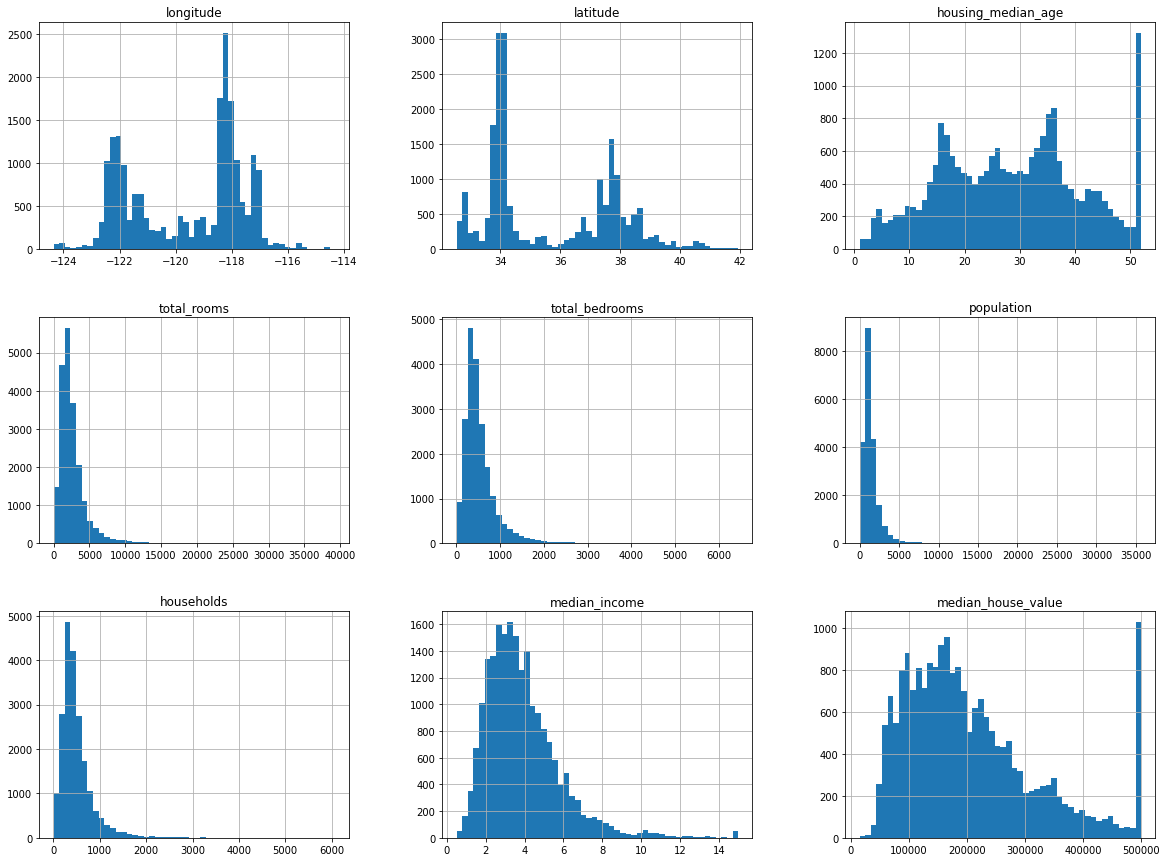

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

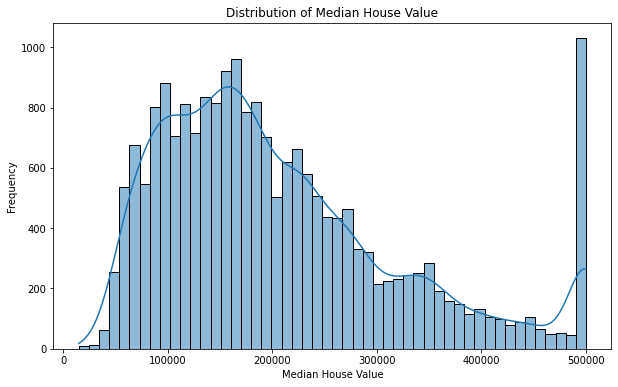

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

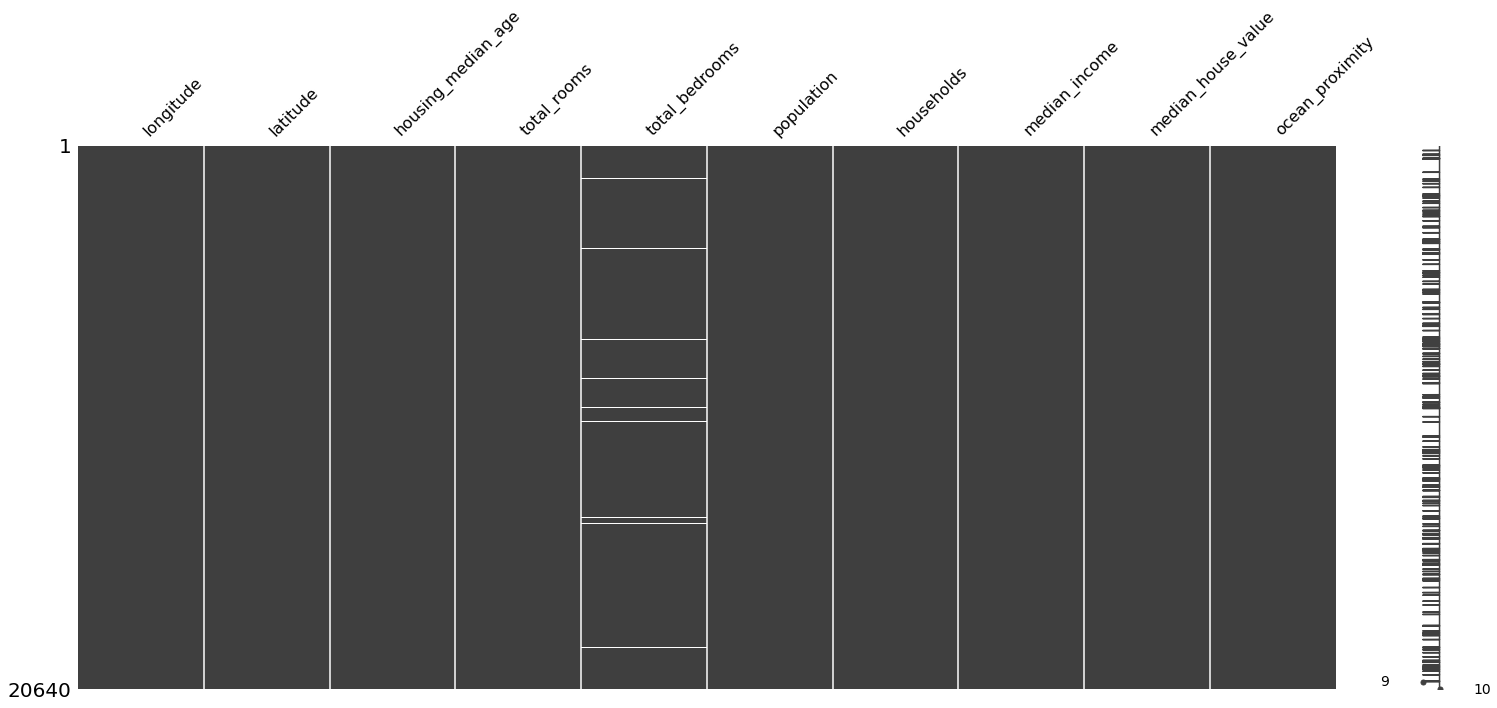

<Figure size 864x432 with 0 Axes>

In [ ]:
#msno (it is a library for visualizing missing data)
import missingno as msno
msno.matrix(df)
plt.figure(figsize=(12, 6))
plt.show()

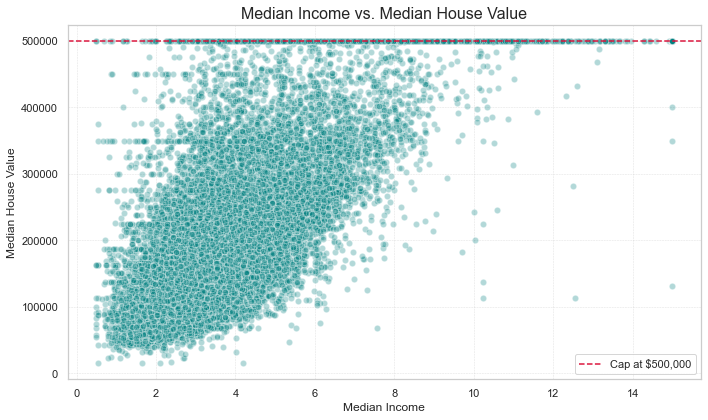

In [46]:
sns.set(style='whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['median_income'],
    df['median_house_value'],
    alpha=0.3,
    color='teal',
    edgecolors='white',
    s=40
)

# Title and axis labels
plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

# Add a horizontal line to show the capping point (optional but insightful)
plt.axhline(y=500000, color='crimson', linestyle='--', linewidth=1.5, label='Cap at $500,000')
plt.legend()

# Improve layout and visuals
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

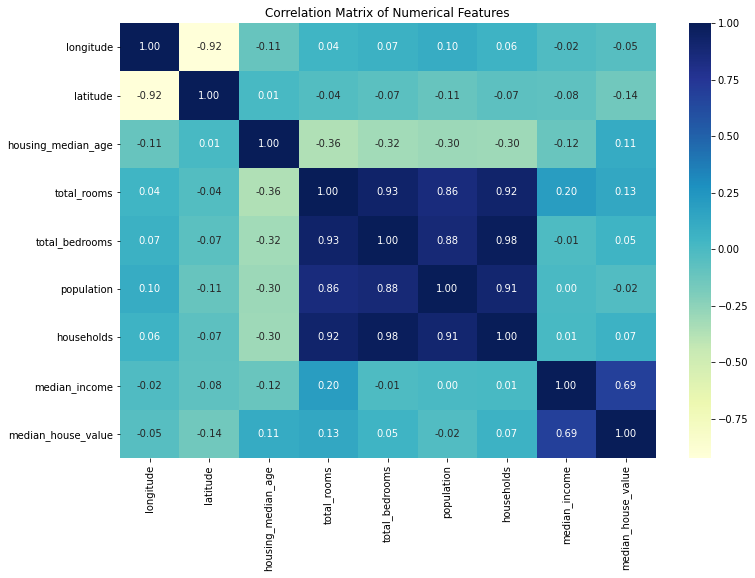

In [38]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [3]:
#creating train set and test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

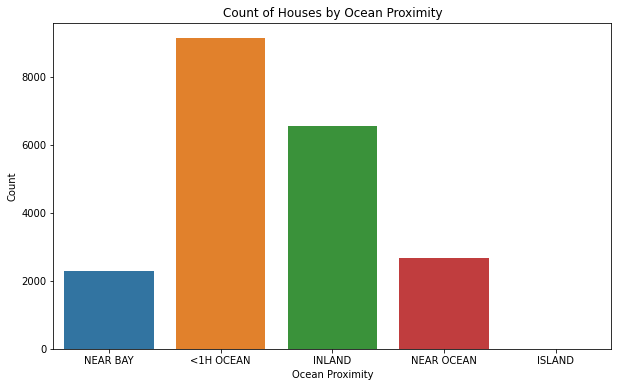

In [31]:
train_set['ocean_proximity'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ocean_proximity')
plt.title('Count of Houses by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

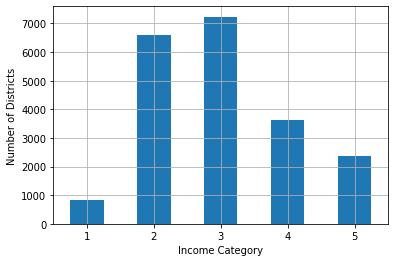

In [4]:
#creating an income category 
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])


#showing this category
df['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [5]:
#stratified sampling
#this method is for ensuring that the income categories are represented in the train and test sets
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split = []
for train_index, test_index in splitter.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    strat_split.append((strat_train_set, strat_test_set))
#checking the income category in the stratified test set
strat_test_set['income_cat'].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [6]:
#second way to do stratified sampling for the income category
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, 
                                                   stratify=df['income_cat'],
                                                    random_state=42)
#checking the income category in the stratified test set
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [6]:
#now that we do not need the income category, we can drop it
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)


#checking the final train and test sets
strat_train_set.head()
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3804,-118.30,37.17,22.0,3480.0,673.0,1541.0,636.0,2.7500,94500.0,INLAND
17282,-121.45,38.60,44.0,2324.0,413.0,823.0,375.0,4.6625,158900.0,INLAND
12044,-122.21,37.80,39.0,2018.0,447.0,1221.0,446.0,3.0757,151000.0,NEAR BAY
19321,-117.14,34.75,33.0,552.0,120.0,347.0,97.0,1.8158,100000.0,INLAND
8378,-122.05,37.90,32.0,4498.0,862.0,1818.0,851.0,4.8088,321200.0,NEAR BAY


In [7]:
#getting a copy of the training set
#this is to avoid changing the original training set
housing = strat_train_set.copy()

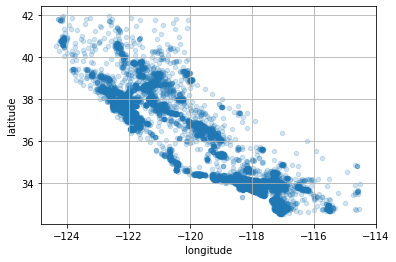

In [10]:
#plotting the geographical data
#this will show the distribution of the districts in the training set
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

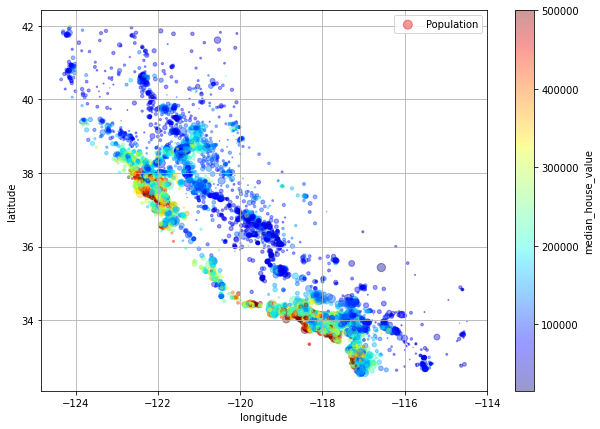

In [ ]:
#jet map
#plotting the geographical data with population and median house value
#red is expensive, blue is cheap, larger circles indicate larger populations
housing.plot(kind='scatter', x='longitude', y='latitude',
             grid= True, alpha=0.4,
             s=housing['population']/100, label='Population',
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.show()

In [8]:
#standard corelation coefficient( also called Pearson's r )
corr_matrix = housing.select_dtypes(include=['number']).corr()
#looking at the correlation with the median house value with other attributes
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690521
total_rooms           0.138451
housing_median_age    0.100461
households            0.068652
total_bedrooms        0.053506
population           -0.021435
longitude            -0.041398
latitude             -0.148153
Name: median_house_value, dtype: float64

<Figure size 720x576 with 0 Axes>

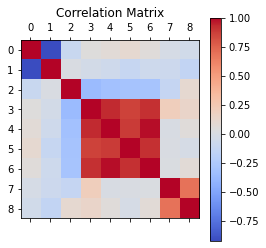

In [ ]:
#plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm')   
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

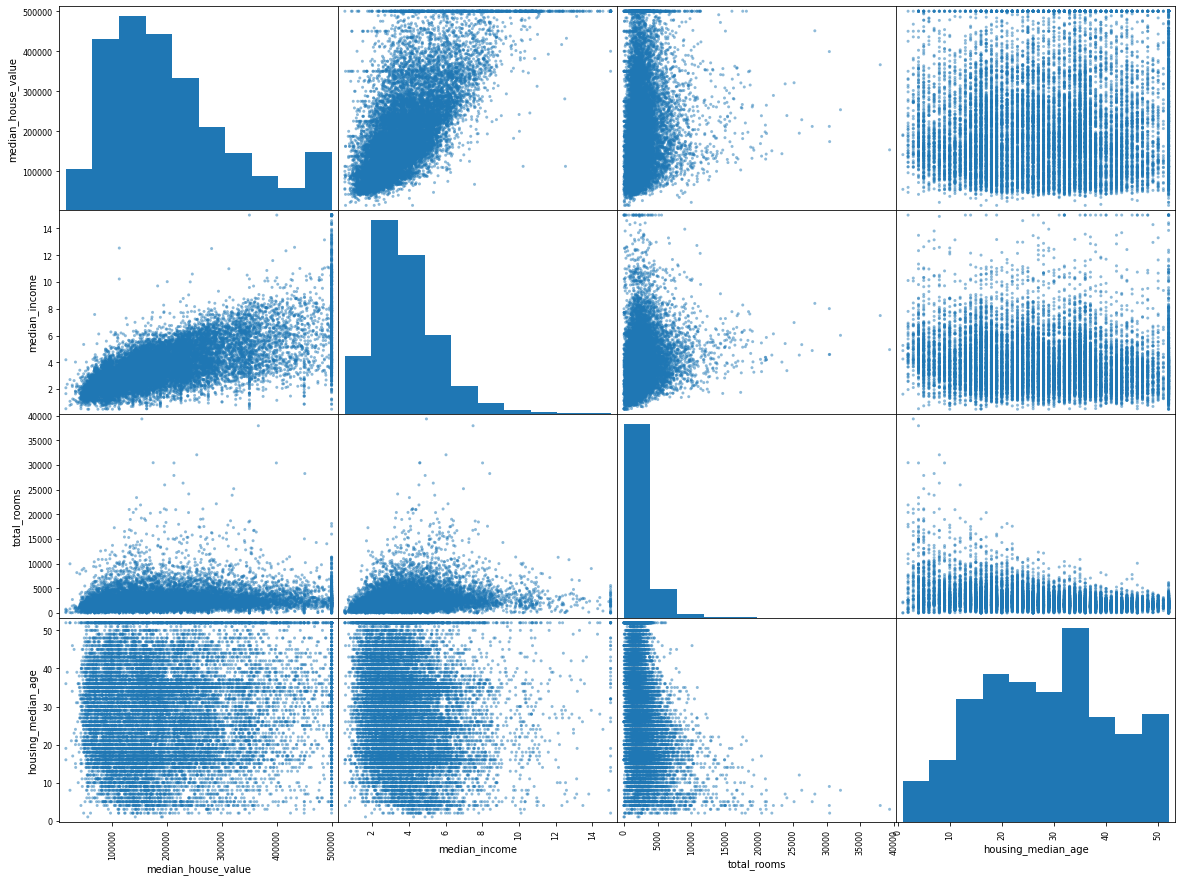

In [23]:
from pandas.plotting import scatter_matrix
#scatter matrix to see the correlation between attributes
#a way to show the good correlations
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(20,15))
plt.show()

<Figure size 864x576 with 0 Axes>

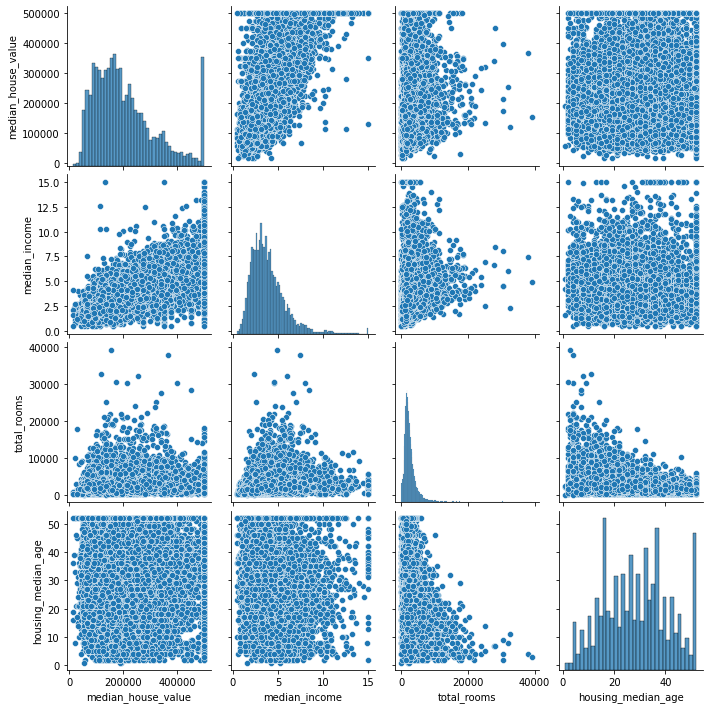

In [10]:
plt.figure(figsize=(12, 8))
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes])

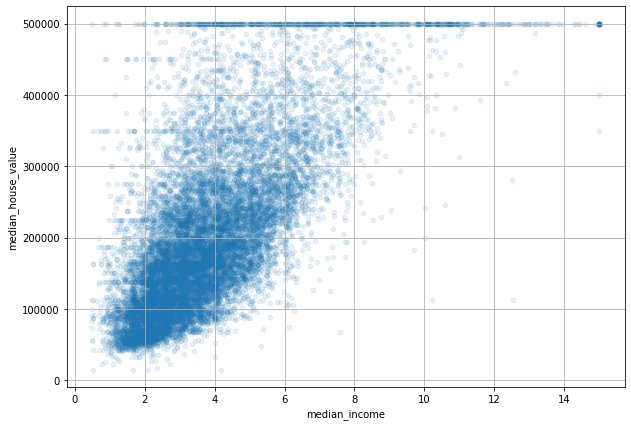

In [22]:
#median income vs median house value
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             grid=True, alpha=0.1, figsize=(10,7))
plt.show()

In [9]:
#creating new attributes
#these attributes are based on the existing ones and can help in predicting the median house value
housing['room_per_house'] = housing['total_rooms'] / housing['housing_median_age']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

#now we see the correlation of these new attributes with the median house value
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690521
total_rooms           0.138451
housing_median_age    0.100461
households            0.068652
total_bedrooms        0.053506
room_per_house        0.030433
population           -0.021435
people_per_house     -0.022052
longitude            -0.041398
latitude             -0.148153
bedrooms_ratio       -0.255879
Name: median_house_value, dtype: float64

In [10]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [11]:
#handling missing values
#first option is to drop all the missing values in one feature
"""housing.dropna(subset=['total_bedrooms'], inplace=True)

#second way is to use mean or median
mdian = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(mdian, inplace= True)"""

#also the best optin is to use sipleimputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#defining the numerical features in the dataset
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

print("imputer statistics:",imputer.statistics_)
print(housing_num.median().values)



imputer statistics: [-118.48     34.24     29.     2132.5     435.     1170.      411.
    3.5313]
[-118.48     34.24     29.     2132.5     435.     1170.      411.
    3.5313]


In [12]:
def apply_median_imputation(df):
     from sklearn.impute import SimpleImputer
    #select numerical features 
     numerical_data = df.select_dtypes(include=[np.number])
     # Create and fit the imputer
     imputer = SimpleImputer(strategy='median')
     imputer.fit(numerical_data)
     # Print imputation statistics
     print("Imputer statistics (medians):", imputer.statistics_)
     print("Calculated medians from pandas:", numerical_data.median().values)

     return imputer, numerical_data

# Apply the imputer to the numerical data
imputer, housing_num = apply_median_imputation(housing)
# Transform the data using the fitted imputer
housing_num_imputed = imputer.transform(housing_num)


Imputer statistics (medians): [-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
Calculated medians from pandas: [-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [12]:
X = imputer.transform(housing_num)

In [13]:
#creating a DataFrame with the transformed data
housing_num_imputed = pd.DataFrame(X, columns=housing_num.columns, index=housing_num
.index)
housing_num_imputed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19887,-121.83,37.99,23.0,1150.0,174.0,572.0,174.0,4.9167
9051,-118.20,34.11,37.0,2040.0,611.0,1698.0,545.0,1.9355
2502,-122.43,37.76,52.0,2356.0,501.0,909.0,481.0,4.2569
19903,-116.42,33.76,14.0,16921.0,2837.0,2524.0,1262.0,7.6281
6129,-121.33,38.65,23.0,2446.0,523.0,1132.0,513.0,2.6266


In [14]:
#handling categorical attributes
from sklearn.preprocessing import OneHotEncoder
#selecting the categorical attributes
housing_cat = housing[['ocean_proximity']]
#creating the one-hot encoder
cat_encoder = OneHotEncoder()
#fitting the encoder to the categorical data
cat_encoder.fit(housing_cat)
#displaying the categories
print("Categories:", cat_encoder.categories_)
#transforming the categorical data
housing_cat_1hot = cat_encoder.transform(housing_cat)
#converting the sparse matrix to a dense matrix
housing_cat_1hot = housing_cat_1hot.toarray()
#creating a DataFrame with the transformed categorical data
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot, columns=
    cat_encoder.get_feature_names_out(), index=housing_cat.index)
#displaying the transformed categorical data
housing_cat_1hot_df.head()

Categories: [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19887,0.0,1.0,0.0,0.0,0.0
9051,1.0,0.0,0.0,0.0,0.0
2502,0.0,0.0,0.0,1.0,0.0
19903,0.0,1.0,0.0,0.0,0.0
6129,0.0,1.0,0.0,0.0,0.0


In [15]:
#normalizing the numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fitting the scaler to the numerical data
scaler.fit(housing_num_imputed)
#transforming the numerical data
housing_num_scaled = scaler.transform(housing_num_imputed)


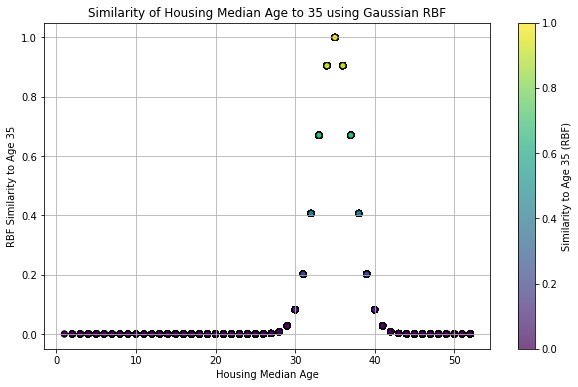

In [17]:

from sklearn.metrics.pairwise import rbf_kernel
ages = housing[['housing_median_age']].values
# Compute similarity to age 35 using RBF kernel
similarity = rbf_kernel(ages, [[35]], gamma=0.1)

# Flatten for easier plotting
similarity = similarity.ravel()

# Plot: housing_median_age vs similarity to 35
plt.figure(figsize=(10, 6))
plt.scatter(housing['housing_median_age'], similarity, 
            c=similarity, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Similarity to Age 35 (RBF)")
plt.title("Similarity of Housing Median Age to 35 using Gaussian RBF")
plt.xlabel("Housing Median Age")
plt.ylabel("RBF Similarity to Age 35")
plt.grid(True)
plt.show()


In [18]:
from sklearn.preprocessing import FunctionTransformer

def rbf_similarity(X, target_age=35, gamma=0.1):
    """
    Compute RBF similarity to a target age.
    
    Parameters:
    - X: Input data (2D array-like)
    - target_age: Age to compute similarity against
    - gamma: Parameter for the RBF kernel
    
    Returns:
    - Similarity scores (1D array)
    """
    return rbf_kernel(X, [[target_age]], gamma=gamma).ravel()

# Create a FunctionTransformer for RBF similarity
rbf_transformer = FunctionTransformer(rbf_similarity,
                                        kw_args={'target_age': 35, 'gamma': 0.1},
                                        validate=False)
# Fit the transformer to the housing data
rbf_transformer.fit(housing[['housing_median_age']])
# Transform the data to get RBF similarity scores
housing['rbf_similarity_to_35'] = rbf_transformer.transform(housing[['housing_median_age']])
# Display the first few rows with the new RBF similarity feature
print(housing[['housing_median_age', 'rbf_similarity_to_35']].head())

       housing_median_age  rbf_similarity_to_35
19887                23.0          5.573904e-07
9051                 37.0          6.703200e-01
2502                 52.0          2.811185e-13
19903                14.0          7.040660e-20
6129                 23.0          5.573904e-07


In [19]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma = 1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        self.kmeans = None

    def fit(self, X, y=None, sample_weight=None):
        """
        Fit the KMeans model to the data.
        
        Parameters:
        - X: Input data (2D array-like)
        - y: Ignored, present for compatibility
        - sample_weight: Optional sample weights for fitting
        
        Returns:
        - self
        """
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        self.kmeans.fit(X, sample_weight=sample_weight)
        return self #always return slef
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, input_features=None):
        """
        Generate feature names for the transformed data.
        
        Parameters:
        - input_features: Ignored, present for compatibility
        
        Returns:
        - List of feature names
        """
        return [f"cluster_similarity_{i}" for i in range(self.n_clusters)]
    
# Example usage
cluster_similarity_transformer = ClusterSimilarity(n_clusters=10, gamma=0.1, random_state=42)
# Fit the transformer to the housing data
similarities = cluster_similarity_transformer.fit_transform(housing[['latitude', 'longitude']], sample_weight=housing_labels)

similarities[:3].round(2)

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.95, 0.06, 0.49, 0.01, 0.93, 0.22, 0.04, 0.97, 0.5 , 0.89],
       [0.09, 1.  , 0.  , 0.76, 0.12, 0.75, 0.98, 0.04, 0.44, 0.04],
       [0.96, 0.05, 0.49, 0.01, 0.82, 0.19, 0.03, 1.  , 0.39, 0.77]])

In [20]:
# Convert the similarities to a DataFrame
similarity_df = pd.DataFrame(similarities, columns=cluster_similarity_transformer.get_feature_names_out(), index=housing.index)
similarity_df.head()

,cluster_similarity_0,cluster_similarity_1,cluster_similarity_2,cluster_similarity_3,cluster_similarity_4,cluster_similarity_5,cluster_similarity_6,cluster_similarity_7,cluster_similarity_8,cluster_similarity_9
19887,0.947472,0.062778,0.486909,0.007881,0.932913,0.222414,0.035026,0.973264,0.500660,0.893551
9051,0.089381,0.997924,0.001811,0.762468,0.116731,0.753694,0.976118,0.043276,0.436610,0.040769
2502,0.955208,0.047452,0.491704,0.005364,0.820097,0.193961,0.025014,0.997599,0.389855,0.767511
19903,0.013496,0.687049,0.000145,0.901322,0.023780,0.297146,0.829977,0.005475,0.161465,0.007103
6129,0.793475,0.049479,0.542212,0.006109,0.919357,0.165304,0.028388,0.851838,0.490305,0.994208


In [21]:
# Concatenate the original DataFrame with the new cluster similarity features
housing_with_clusters = pd.concat([housing,similarity_df], axis=1)
# Display the first few rows of the final DataFrame
print(housing_with_clusters.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19887    -121.83     37.99                23.0       1150.0           174.0   
9051     -118.20     34.11                37.0       2040.0           611.0   
2502     -122.43     37.76                52.0       2356.0           501.0   
19903    -116.42     33.76                14.0      16921.0          2837.0   
6129     -121.33     38.65                23.0       2446.0           523.0   

       population  households  median_income ocean_proximity  \
19887       572.0       174.0         4.9167          INLAND   
9051       1698.0       545.0         1.9355       <1H OCEAN   
2502        909.0       481.0         4.2569        NEAR BAY   
19903      2524.0      1262.0         7.6281          INLAND   
6129       1132.0       513.0         2.6266          INLAND   

       rbf_similarity_to_35  cluster_similarity_0  cluster_similarity_1  \
19887          5.573904e-07              0.947472              0.

In [22]:
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

tree_rmses = cross_val_score(
    RandomForestRegressor(),
    housing_num_scaled,
    housing_labels,
    scoring='neg_root_mean_squared_error',
    cv=5
)
tree_rmse_scores = -tree_rmses
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [50790.18828691 50613.47105664 49742.92260091 48841.78388908
 47770.57628767]
Mean: 49551.788424241706
Standard deviation: 1129.0845513684185


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low=3, high=50),
    'max_features': randint(low=2, high=20)
}
random_search = RandomizedSearchCV(
    RandomForestRegressor(),param_distributions=param_distribs,
    n_iter=10, cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True, random_state=42)
random_search.fit(housing_num_scaled, housing_labels)
#displaying the best parameters
print("Best parameters from Randomized Search:", random_search.best_params_)
#displaying the best score
best_score = -random_search.best_score_
print("Best score from Randomized Search (RMSE):", best_score)
#displaying the best estimator
best_estimator = random_search.best_estimator_
print("Best estimator from Randomized Search:", best_estimator)

Best parameters from Randomized Search: {'max_features': 5, 'n_estimators': 42}
Best score from Randomized Search (RMSE): 49836.83002285125
Best estimator from Randomized Search: RandomForestRegressor(max_features=5, n_estimators=42)


In [22]:
#training the model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_features=5, n_estimators=42, random_state=42)
forest_reg.fit(housing_num_scaled, housing_labels)
#predicting the median house value
housing_predictions = forest_reg.predict(housing_num_scaled)
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE:", forest_rmse)
print("Random Forest MSE:", forest_mse)

Random Forest RMSE: 18918.176425003323
Random Forest MSE: 357897399.24755144


In [23]:
#how well our model work(percentage)
from sklearn.metrics import r2_score
forest_r2 = r2_score(housing_labels, housing_predictions)
print("Random Forest R^2:", forest_r2)

Random Forest R^2: 0.9732065668002806


In [24]:
# Testing the model on the test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()
# Preprocessing the test set
X_test_num = X_test.select_dtypes(include=[np.number])
X_test_num_imputed = imputer.transform(X_test_num)
X_test_scaled = scaler.transform(X_test_num_imputed)
forest_test_predictions = forest_reg.predict(X_test_scaled)

forest_test_mse = mean_squared_error(y_test, forest_test_predictions)
forest_test_rmse = np.sqrt(forest_test_mse)
print("Random Forest Test RMSE:", forest_test_rmse)
print("Random Forest Test MSE:", forest_test_mse)

forest_test_r2 = r2_score(y_test, forest_test_predictions)
print("Random Forest Test R^2:", forest_test_r2)

Random Forest Test RMSE: 50055.66736001394
Random Forest Test MSE: 2505569834.8563647
Random Forest Test R^2: 0.8093976304364844


C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


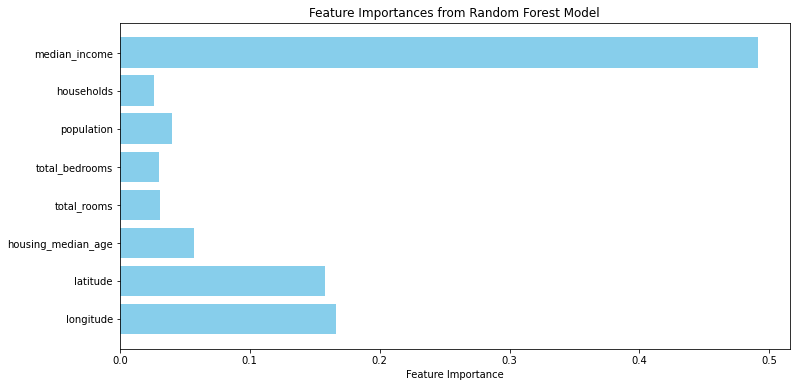

In [25]:
# Plotting feature importances
feature_importances = forest_reg.feature_importances_
features = housing_num_imputed.columns.tolist()  # Only numerical features were used in training
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest Model')
plt.show()

In [26]:
#saving the model
import joblib
joblib.dump(forest_reg, 'random_forest_model.pkl')
#loading the model
loaded_model = joblib.load('random_forest_model.pkl')
#predicting with the loaded model
loaded_predictions = loaded_model.predict(housing_num_scaled)
#calculating the RMSE for the loaded model
loaded_mse = mean_squared_error(housing_labels, loaded_predictions)
loaded_rmse = np.sqrt(loaded_mse)
print("Loaded Model RMSE:", loaded_rmse)
print("Loaded Model MSE:", loaded_mse)

Loaded Model RMSE: 18918.176425003323
Loaded Model MSE: 357897399.24755144
